In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
import keras 
import time
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
# Constants 
batch_size = 64 
num_classes = 10 
epochs = 30

In [29]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [30]:
def build_model(optimizer):

    model=Sequential()

    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.MeanSquaredError(), optimizer= optimizer, metrics=['accuracy'])

    return model

In [31]:
SGD_momentum = keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD_momentum"
)

SGD_nesterov = keras.optimizers.SGD(    
    learning_rate=0.01,
    momentum=0.0,
    nesterov=True,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="SGD_nesterov"
)


In [32]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD','SGD_momentum','SGD_nesterov']

In [33]:
models = {}
total_time = {}
loss_on_test = {}
acc_on_test = {}

for i in optimizers:
    if i == "SGD_momentum": 
        i = SGD_momentum
        p = "SGD_momentum"
    elif i == "SGD_nesterov": 
        i = SGD_nesterov
        p = "SGD_nesterov"
    else: 
        p = i
    start_time = time.perf_counter()
    model = build_model(i)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    loss,accuracy = model.evaluate(x_test,y_test)
    end_time = time.perf_counter()
    
    models[p] = history 
    total_time[p] = [start_time, end_time] 
    loss_on_test[p] = loss
    acc_on_test[p] = accuracy 

Epoch 1/30
938/938 [==============================] - 28s 28ms/step - loss: 0.0906 - accuracy: 0.0862
Epoch 2/30
938/938 [==============================] - 27s 28ms/step - loss: 0.0904 - accuracy: 0.0936
Epoch 3/30
938/938 [==============================] - 26s 27ms/step - loss: 0.0903 - accuracy: 0.0967
Epoch 4/30
938/938 [==============================] - 26s 28ms/step - loss: 0.0901 - accuracy: 0.1023
Epoch 5/30
938/938 [==============================] - 26s 28ms/step - loss: 0.0900 - accuracy: 0.1075
Epoch 6/30
938/938 [==============================] - 27s 28ms/step - loss: 0.0898 - accuracy: 0.1140
Epoch 7/30
938/938 [==============================] - 26s 28ms/step - loss: 0.0896 - accuracy: 0.1289
Epoch 9/30
938/938 [==============================] - 26s 28ms/step - loss: 0.0895 - accuracy: 0.1357
Epoch 10/30
938/938 [==============================] - 26s 28ms/step - loss: 0.0893 - accuracy: 0.1464
Epoch 11/30
938/938 [==============================] - 26s 27ms/step - loss: 0.08

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 23s 25ms/step - loss: 0.0455 - accuracy: 0.7082
Epoch 25/30
938/938 [==============================] - 23s 25ms/step - loss: 0.0431 - accuracy: 0.7245
Epoch 26/30
938/938 [==============================] - 23s 24ms/step - loss: 0.0412 - accuracy: 0.7356
Epoch 27/30
938/938 [==============================] - 23s 25ms/step - loss: 0.0396 - accuracy: 0.7462
Epoch 28/30
938/938 [==============================] - 23s 24ms/step - loss: 0.0381 - accuracy: 0.7541
Epoch 29/30
938/938 [==============================] - 23s 25ms/step - loss: 0.0363 - accuracy: 0.7675
Epoch 30/30
313/313 [==============================] - 2s 5ms/step - loss: 0.0255 - accuracy: 0.8585
Epoch 1/30
938/938 [==============================] - 28s 30ms/step - loss: 0.0013 - accuracy: 0.9919
Epoch 16/30
938/938 [==============================] - 26s 27ms/step - loss: 0.0011 - accuracy: 0.9928
Epoch 17/30
938/938 [==============================] - 25s 26ms/step - loss: 0.0012 - ac

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 24s 25ms/step - loss: 0.0187 - accuracy: 0.8726
Epoch 2/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0073 - accuracy: 0.9535
Epoch 3/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0053 - accuracy: 0.9669
Epoch 4/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0041 - accuracy: 0.9745
Epoch 5/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0036 - accuracy: 0.9773
Epoch 6/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0033 - accuracy: 0.9794
Epoch 7/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0028 - accuracy: 0.9828
Epoch 8/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0026 - accuracy: 0.9836
Epoch 9/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0024 - accuracy: 0.9850
Epoch 10/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0021 - accurac

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 24s 26ms/step - loss: 0.0016 - accuracy: 0.9905
Epoch 17/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0015 - accuracy: 0.9905
Epoch 18/30
938/938 [==============================] - 23s 25ms/step - loss: 0.0014 - accuracy: 0.9914
Epoch 19/30
938/938 [==============================] - 23s 25ms/step - loss: 0.0014 - accuracy: 0.9914
Epoch 20/30
938/938 [==============================] - 23s 25ms/step - loss: 0.0013 - accuracy: 0.9921
Epoch 21/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0012 - accuracy: 0.9922
Epoch 22/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0012 - accuracy: 0.9929
Epoch 23/30
938/938 [==============================] - 24s 26ms/step - loss: 0.0011 - accuracy: 0.9934
Epoch 24/30
422/938 [============>.................] - ETA: 12s - loss: 0.0010 - accuracy: 0.9938

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 24s 25ms/step - loss: 0.0010 - accuracy: 0.9936
Epoch 27/30
938/938 [==============================] - 24s 25ms/step - loss: 9.9304e-04 - accuracy: 0.9941
Epoch 28/30
938/938 [==============================] - 24s 25ms/step - loss: 9.5100e-04 - accuracy: 0.9944
Epoch 29/30
938/938 [==============================] - 23s 25ms/step - loss: 9.7490e-04 - accuracy: 0.9941
Epoch 30/30
313/313 [==============================] - 2s 6ms/step - loss: 0.0014 - accuracy: 0.9911
Epoch 1/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0900 - accuracy: 0.1052
Epoch 2/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0891 - accuracy: 0.1790
Epoch 3/30
938/938 [==============================] - 21s 22ms/step - loss: 0.0880 - accuracy: 0.2619
Epoch 4/30
938/938 [==============================] - 21s 22ms/step - loss: 0.0861 - accuracy: 0.3433
Epoch 5/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 22s 24ms/step - loss: 0.0172 - accuracy: 0.8879
Epoch 5/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0153 - accuracy: 0.8996
Epoch 6/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0139 - accuracy: 0.9096
Epoch 7/30
938/938 [==============================] - 22s 24ms/step - loss: 0.0131 - accuracy: 0.9147
Epoch 8/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0123 - accuracy: 0.9204
Epoch 9/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0117 - accuracy: 0.9245
Epoch 10/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0111 - accuracy: 0.9286
Epoch 11/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0106 - accuracy: 0.9321
Epoch 12/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0103 - accuracy: 0.9337
Epoch 13/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0099 - accu

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 22s 23ms/step - loss: 0.0686 - accuracy: 0.5416
Epoch 6/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0564 - accuracy: 0.6324
Epoch 7/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0464 - accuracy: 0.6985
Epoch 8/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0396 - accuracy: 0.7416
Epoch 9/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0352 - accuracy: 0.7704
Epoch 10/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0319 - accuracy: 0.7915
Epoch 11/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0297 - accuracy: 0.8047
Epoch 12/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0277 - accuracy: 0.8201
Epoch 13/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0264 - accuracy: 0.8264
Epoch 14/30
623/938 [==================>...........] - ETA: 7s - loss: 0.0256 - accuracy:

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



938/938 [==============================] - 21s 23ms/step - loss: 0.0229 - accuracy: 0.8491
Epoch 18/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0222 - accuracy: 0.8540
Epoch 19/30
938/938 [==============================] - 21s 22ms/step - loss: 0.0218 - accuracy: 0.8575
Epoch 20/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0213 - accuracy: 0.8606
Epoch 21/30
938/938 [==============================] - 24s 25ms/step - loss: 0.0207 - accuracy: 0.8635
Epoch 22/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0204 - accuracy: 0.8664
Epoch 23/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0202 - accuracy: 0.8676
Epoch 24/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0197 - accuracy: 0.8713
Epoch 25/30
938/938 [==============================] - 21s 23ms/step - loss: 0.0193 - accuracy: 0.8734
Epoch 26/30
938/938 [==============================] - 22s 23ms/step - loss: 0.0190 -

In [45]:
print(total_time)

{'Adadelta': 805.2470218010003, 'Adagrad': 696.7992825090005, 'Adam': 746.4149594239998, 'RMSprop': 716.9948058090004, 'SGD': 685.7155607049999, 'SGD_momentum': 657.4115083140005, 'SGD_nesterov': 685.1148823569984, 30: [0, 22.83716274523328, 45.67432549046656, 68.51148823569983, 91.34865098093312, 114.1858137261664, 137.0229764713997, 159.86013921663297, 182.69730196186626, 205.53446470709954, 228.37162745233283, 251.20879019756612, 274.0459529427994, 296.88311568803266, 319.72027843326595, 342.55744117849923, 365.3946039237325, 388.2317666689658, 411.0689294141991, 433.9060921594324, 456.74325490466566, 479.58041764989895, 502.41758039513223, 525.2547431403655, 548.0919058855987, 570.929068630832, 593.7662313760653, 616.6033941212986, 639.4405568665319, 662.2777196117652, 685.1148823569985]}


In [5]:
total_time = {'Adadelta': 805.2470218010003, 'Adagrad': 696.7992825090005, 'Adam': 746.4149594239998, 'RMSprop': 716.9948058090004, 'SGD': 685.7155607049999, 'SGD_momentum': 657.4115083140005, 'SGD_nesterov': 685.1148823569984}


In [12]:
d = {}
for i in total_time.keys():
    x = total_time[i]
    print("x",x)
    increment = x/epochs 
    print(i)
    current = 0 
    l = []
    for f in range(0,epochs+1): 
        l.append(current)
        current += increment 
    total_time[i] = l
    


x 805.2470218010003
Adadelta
x 696.7992825090005
Adagrad
x 746.4149594239998
Adam
x 716.9948058090004
RMSprop
x 685.7155607049999
SGD
x 657.4115083140005
SGD_momentum
x 685.1148823569984
SGD_nesterov


In [13]:
total_time

{'Adadelta': [0,
  26.841567393366677,
  53.683134786733355,
  80.52470218010004,
  107.36626957346671,
  134.20783696683338,
  161.04940436020007,
  187.89097175356676,
  214.73253914693345,
  241.57410654030014,
  268.4156739336668,
  295.2572413270335,
  322.0988087204002,
  348.9403761137669,
  375.7819435071336,
  402.62351090050026,
  429.46507829386695,
  456.30664568723364,
  483.1482130806003,
  509.989780473967,
  536.8313478673336,
  563.6729152607003,
  590.5144826540669,
  617.3560500474335,
  644.1976174408002,
  671.0391848341668,
  697.8807522275334,
  724.7223196209001,
  751.5638870142667,
  778.4054544076333,
  805.247021801],
 'Adagrad': [0,
  23.226642750300016,
  46.45328550060003,
  69.67992825090005,
  92.90657100120006,
  116.13321375150008,
  139.3598565018001,
  162.5864992521001,
  185.81314200240013,
  209.03978475270014,
  232.26642750300016,
  255.49307025330017,
  278.7197130036002,
  301.9463557539002,
  325.1729985042002,
  348.39964125450024,
  371.62

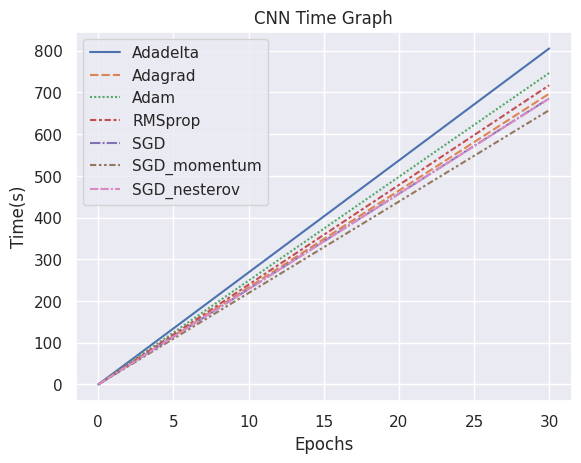

In [20]:
sns.set_theme()
sns.lineplot(data=total_time)
plt.title("CNN Time Graph")
plt.xlabel("Epochs")
plt.ylabel("Time(s)")
plt.show()

In [35]:
print(loss_on_test)


{'Adadelta': 0.0848025232553482, 'Adagrad': 0.02549068070948124, 'Adam': 0.0017674857517704368, 'RMSprop': 0.001371953054331243, 'SGD': 0.012171371839940548, 'SGD_momentum': 0.004460026044398546, 'SGD_nesterov': 0.012118134647607803}


In [6]:
loss_on_test = {'Adadelta': 0.0848025232553482, 'Adagrad': 0.02549068070948124, 'Adam': 0.0017674857517704368, 'RMSprop': 0.001371953054331243, 'SGD': 0.012171371839940548, 'SGD_momentum': 0.004460026044398546, 'SGD_nesterov': 0.012118134647607803}

In [36]:
print(acc_on_test)

{'Adadelta': 0.5669000148773193, 'Adagrad': 0.8585000038146973, 'Adam': 0.9890000224113464, 'RMSprop': 0.991100013256073, 'SGD': 0.9210000038146973, 'SGD_momentum': 0.9703999757766724, 'SGD_nesterov': 0.920799970626831}


In [7]:
acc_on_test = {'Adadelta': 0.5669000148773193, 'Adagrad': 0.8585000038146973, 'Adam': 0.9890000224113464, 'RMSprop': 0.991100013256073, 'SGD': 0.9210000038146973, 'SGD_momentum': 0.9703999757766724, 'SGD_nesterov': 0.920799970626831}


In [37]:
print(models)

{'Adadelta': <keras.src.callbacks.History object at 0x7f29660658a0>, 'Adagrad': <keras.src.callbacks.History object at 0x7f29487c9b10>, 'Adam': <keras.src.callbacks.History object at 0x7f2949cfee30>, 'RMSprop': <keras.src.callbacks.History object at 0x7f294b33a200>, 'SGD': <keras.src.callbacks.History object at 0x7f29447069e0>, 'SGD_momentum': <keras.src.callbacks.History object at 0x7f2966435f90>, 'SGD_nesterov': <keras.src.callbacks.History object at 0x7f299e397100>}


In [15]:
import seaborn as sns

In [39]:
#acc_dict = {'Adadelta': [0.08624999970197678, 0.09363333135843277, 0.09671666473150253, 0.10231667011976242, 0.10750000178813934, 0.11396666616201401, 0.12014999985694885, 0.12893334031105042, 0.13573333621025085, 0.14638333022594452, 0.15488334000110626, 0.16326667368412018, 0.1704999953508377, 0.18291667103767395, 0.1899999976158142, 0.20205000042915344, 0.21439999341964722, 0.2256166636943817, 0.2382500022649765, 0.24926666915416718, 0.26065000891685486, 0.27451667189598083, 0.2870999872684479, 0.2995666563510895, 0.3136333227157593, 0.3244166672229767, 0.3374166786670685, 0.3488333225250244, 0.3574833273887634, 0.36971667408943176], 'Adagrad': [0.10361666977405548, 0.12771666049957275, 0.15320000052452087, 0.18299999833106995, 0.2157333344221115, 0.24695000052452087, 0.2812333405017853, 0.31235000491142273, 0.342849999666214, 0.3726833462715149, 0.39864999055862427, 0.42196667194366455, 0.4508500099182129, 0.47813332080841064, 0.5106333494186401, 0.5361999869346619, 0.5595666766166687, 0.5842333436012268, 0.6064666509628296, 0.6320333480834961, 0.6556666493415833, 0.6762666702270508, 0.6937666535377502, 0.7081666588783264, 0.7245333194732666, 0.7356166839599609, 0.7461833357810974, 0.7541000247001648, 0.767549991607666, 0.7724499702453613], 'Adam': [0.928849995136261, 0.9706833362579346, 0.9768333435058594, 0.9811833500862122, 0.9844833612442017, 0.9857000112533569, 0.9866333603858948, 0.988349974155426, 0.9891833066940308, 0.9897500276565552, 0.9905499815940857, 0.9911666512489319, 0.9913166761398315, 0.9917833209037781, 0.9919166564941406, 0.992816686630249, 0.9927833080291748, 0.993483304977417, 0.993483304977417, 0.9934499859809875, 0.9935500025749207, 0.9940333366394043, 0.9940333366394043, 0.9947333335876465, 0.9942166805267334, 0.9947999715805054, 0.9949166774749756, 0.994533360004425, 0.9950666427612305, 0.9949666857719421], 'RMSprop': [0.8726166486740112, 0.953499972820282, 0.9669166803359985, 0.9745166897773743, 0.977316677570343, 0.9794166684150696, 0.9828333258628845, 0.9835666418075562, 0.9850333333015442, 0.9870333075523376, 0.9871000051498413, 0.9874666929244995, 0.9885166883468628, 0.9891499876976013, 0.9893500208854675, 0.9904500246047974, 0.9904666543006897, 0.9914000034332275, 0.9914000034332275, 0.9920833110809326, 0.9922000169754028, 0.9928500056266785, 0.9934499859809875, 0.9930499792098999, 0.9936666488647461, 0.9935833215713501, 0.9940999746322632, 0.994350016117096, 0.9940999746322632, 0.9947333335876465], 'SGD': [0.10520000010728836, 0.1790333390235901, 0.26186665892601013, 0.3432833254337311, 0.4304499924182892, 0.5253000259399414, 0.6044666767120361, 0.6659333109855652, 0.7160833477973938, 0.755133330821991, 0.7786833047866821, 0.7995499968528748, 0.8112000226974487, 0.8238666653633118, 0.8306666612625122, 0.8382666707038879, 0.8444333076477051, 0.8502166867256165, 0.8547499775886536, 0.8560166954994202, 0.8602333068847656, 0.864716649055481, 0.8671000003814697, 0.8685166835784912, 0.8725333213806152, 0.8744166493415833, 0.8769166469573975, 0.8780166506767273, 0.8785499930381775, 0.8821166753768921], 'SGD_momentum': [0.4547500014305115, 0.8237000107765198, 0.8699666857719421, 0.8878999948501587, 0.8995500206947327, 0.9095666408538818, 0.9146999716758728, 0.920366644859314, 0.9245166778564453, 0.9285833239555359, 0.9320666790008545, 0.9336666464805603, 0.9362666606903076, 0.9397333264350891, 0.9398000240325928, 0.9430000185966492, 0.942466676235199, 0.9452833533287048, 0.946066677570343, 0.947516679763794, 0.9492833614349365, 0.9489333629608154, 0.9511666893959045, 0.9504500031471252, 0.9524000287055969, 0.9536833167076111, 0.9536666870117188, 0.9537333250045776, 0.9558166861534119, 0.9555500149726868], 'SGD_nesterov': [0.14810000360012054, 0.26901665329933167, 0.3889999985694885, 0.46373334527015686, 0.5415999889373779, 0.6323666572570801, 0.6984666585922241, 0.7416499853134155, 0.7703999876976013, 0.7915499806404114, 0.8046833276748657, 0.8200666904449463, 0.8264333605766296, 0.8337666392326355, 0.8413166403770447, 0.8431500196456909, 0.8490999937057495, 0.8540166616439819, 0.8574833273887634, 0.8605833053588867, 0.8634666800498962, 0.8664000034332275, 0.8675500154495239, 0.8712666630744934, 0.87336665391922, 0.8751333355903625, 0.8768166899681091, 0.8777999877929688, 0.880216658115387, 0.8819833397865295]}
acc_dict = {}
for key,value in models.items(): 
    acc_dict[key] = value.history['accuracy']
print(acc_dict)

{'Adadelta': [0.08624999970197678, 0.09363333135843277, 0.09671666473150253, 0.10231667011976242, 0.10750000178813934, 0.11396666616201401, 0.12014999985694885, 0.12893334031105042, 0.13573333621025085, 0.14638333022594452, 0.15488334000110626, 0.16326667368412018, 0.1704999953508377, 0.18291667103767395, 0.1899999976158142, 0.20205000042915344, 0.21439999341964722, 0.2256166636943817, 0.2382500022649765, 0.24926666915416718, 0.26065000891685486, 0.27451667189598083, 0.2870999872684479, 0.2995666563510895, 0.3136333227157593, 0.3244166672229767, 0.3374166786670685, 0.3488333225250244, 0.3574833273887634, 0.36971667408943176], 'Adagrad': [0.10361666977405548, 0.12771666049957275, 0.15320000052452087, 0.18299999833106995, 0.2157333344221115, 0.24695000052452087, 0.2812333405017853, 0.31235000491142273, 0.342849999666214, 0.3726833462715149, 0.39864999055862427, 0.42196667194366455, 0.4508500099182129, 0.47813332080841064, 0.5106333494186401, 0.5361999869346619, 0.5595666766166687, 0.5842

In [40]:
#loss_dict = {'Adadelta': [0.09059300273656845, 0.09041634202003479, 0.09028922766447067, 0.09013795107603073, 0.0900028645992279, 0.08984878659248352, 0.0897466391324997, 0.08959367871284485, 0.08947349339723587, 0.08931318670511246, 0.0892159566283226, 0.08904889971017838, 0.08892745524644852, 0.08876556903123856, 0.08865740895271301, 0.088504359126091, 0.08832574635744095, 0.08819534629583359, 0.088007852435112, 0.08786560595035553, 0.08768413215875626, 0.08750909566879272, 0.08731292933225632, 0.08712997287511826, 0.08687745034694672, 0.08668007701635361, 0.08642624318599701, 0.08618538081645966, 0.08594775944948196, 0.08567089587450027], 'Adagrad': [0.09007296711206436, 0.08971710503101349, 0.08940193802118301, 0.08903343975543976, 0.0886300727725029, 0.08819680660963058, 0.08766789734363556, 0.08708348125219345, 0.08632383495569229, 0.08540656417608261, 0.08424606174230576, 0.08284078538417816, 0.08098341524600983, 0.0788126289844513, 0.07610229402780533, 0.07296599447727203, 0.06924884766340256, 0.06527459621429443, 0.06134960055351257, 0.057562559843063354, 0.05387742817401886, 0.05068371072411537, 0.04790922999382019, 0.04552149400115013, 0.043051961809396744, 0.041235461831092834, 0.03955728933215141, 0.038071442395448685, 0.03625907003879547, 0.03526608645915985], 'Adam': [0.01081855222582817, 0.00464747054502368, 0.0035837499890476465, 0.002945532789453864, 0.0024974565021693707, 0.0022434729617089033, 0.0020734930876642466, 0.0018272933084517717, 0.0017056282376870513, 0.0015965353231877089, 0.0014676658902317286, 0.0014192868256941438, 0.0013739514397457242, 0.00130746909417212, 0.0012536973226815462, 0.0011154217645525932, 0.0011587499175220728, 0.0010647893650457263, 0.0010247473837807775, 0.001017949776723981, 0.0010114507749676704, 0.0009435937972739339, 0.0009301113896071911, 0.0008286677184514701, 0.0009033782407641411, 0.000854192825499922, 0.0007799482555128634, 0.0008594493847340345, 0.0008017735090106726, 0.0008146589971147478], 'RMSprop': [0.018732497468590736, 0.007337813265621662, 0.005264977924525738, 0.004125221166759729, 0.0036180235911160707, 0.0032508063595741987, 0.002771928673610091, 0.002623477252200246, 0.0024137147702276707, 0.0021380905527621508, 0.002081400714814663, 0.0019483906216919422, 0.0018569710664451122, 0.0016932954313233495, 0.0016801063902676105, 0.0015575331635773182, 0.0015206263633444905, 0.0013694856315851212, 0.0013711433857679367, 0.0012982649495825171, 0.0012495174305513501, 0.001168589573353529, 0.001097287517040968, 0.0011157902190461755, 0.0010584481060504913, 0.001025382662191987, 0.0009930419037118554, 0.0009510006639175117, 0.0009748977608978748, 0.0009142140625044703], 'SGD': [0.09004796296358109, 0.08913206309080124, 0.08796724677085876, 0.08605293184518814, 0.0823177844285965, 0.07477929443120956, 0.06290648132562637, 0.051450829952955246, 0.043292220681905746, 0.037548694759607315, 0.033738452941179276, 0.030650636181235313, 0.028774550184607506, 0.026981152594089508, 0.02574891597032547, 0.02472631260752678, 0.02378014661371708, 0.02294505387544632, 0.022293614223599434, 0.021792028099298477, 0.02119332365691662, 0.020694445818662643, 0.02030104771256447, 0.01996270753443241, 0.019567588344216347, 0.019162466749548912, 0.018850956112146378, 0.018623579293489456, 0.018398839980363846, 0.01811072789132595], 'SGD_momentum': [0.07146572321653366, 0.026799306273460388, 0.01979942061007023, 0.017151961103081703, 0.015342799946665764, 0.013930675573647022, 0.013067674823105335, 0.01230742409825325, 0.011667566373944283, 0.011050154455006123, 0.010586205869913101, 0.010334986262023449, 0.009916153736412525, 0.009460704401135445, 0.009379168972373009, 0.008990836329758167, 0.008813579566776752, 0.008526178076863289, 0.008399293757975101, 0.00818950030952692, 0.00798033270984888, 0.007910626009106636, 0.007621555123478174, 0.007678948808461428, 0.007443121634423733, 0.007266603875905275, 0.0072469208389520645, 0.007117582485079765, 0.006954161915928125, 0.0068456572480499744], 'SGD_nesterov': [0.08938324451446533, 0.08769262582063675, 0.08486517518758774, 0.07895712554454803, 0.06864175945520401, 0.05638069286942482, 0.04642283543944359, 0.03959045559167862, 0.03518940880894661, 0.03191272169351578, 0.029666222631931305, 0.02768806181848049, 0.026437200605869293, 0.025324052199721336, 0.02428247034549713, 0.023623544722795486, 0.02294541895389557, 0.022180968895554543, 0.02178153209388256, 0.02125570923089981, 0.020749932155013084, 0.020413199439644814, 0.02015679143369198, 0.019662078469991684, 0.01934785395860672, 0.019028108566999435, 0.01873503439128399, 0.01849084347486496, 0.01815873384475708, 0.017968054860830307]}
loss_dict = {}
for key,value in models.items(): 
    loss_dict[key] = value.history['loss']

In [41]:
print(loss_dict)

{'Adadelta': [0.09059300273656845, 0.09041634202003479, 0.09028922766447067, 0.09013795107603073, 0.0900028645992279, 0.08984878659248352, 0.0897466391324997, 0.08959367871284485, 0.08947349339723587, 0.08931318670511246, 0.0892159566283226, 0.08904889971017838, 0.08892745524644852, 0.08876556903123856, 0.08865740895271301, 0.088504359126091, 0.08832574635744095, 0.08819534629583359, 0.088007852435112, 0.08786560595035553, 0.08768413215875626, 0.08750909566879272, 0.08731292933225632, 0.08712997287511826, 0.08687745034694672, 0.08668007701635361, 0.08642624318599701, 0.08618538081645966, 0.08594775944948196, 0.08567089587450027], 'Adagrad': [0.09007296711206436, 0.08971710503101349, 0.08940193802118301, 0.08903343975543976, 0.0886300727725029, 0.08819680660963058, 0.08766789734363556, 0.08708348125219345, 0.08632383495569229, 0.08540656417608261, 0.08424606174230576, 0.08284078538417816, 0.08098341524600983, 0.0788126289844513, 0.07610229402780533, 0.07296599447727203, 0.06924884766340

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

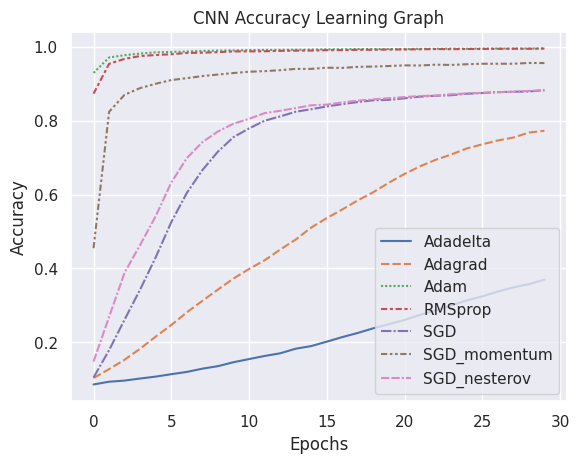

In [14]:
sns.set_theme()
sns.lineplot(data=acc_dict)
plt.title("CNN Accuracy Learning Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

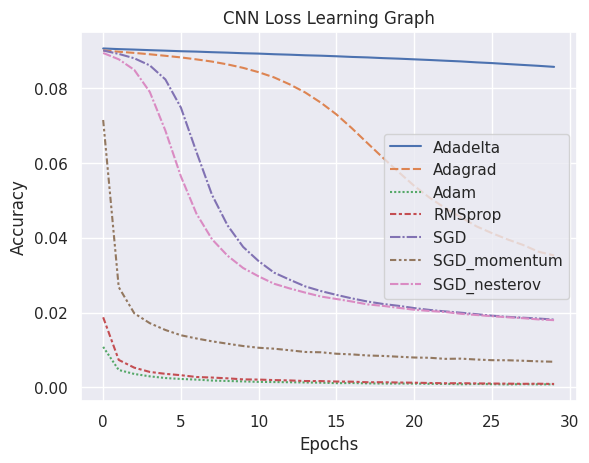

In [17]:
sns.set_theme()
sns.lineplot(data=loss_dict)
plt.title("CNN Loss Learning Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

ValueError: If using all scalar values, you must pass an index